## Taitanic 數據集練習預測
#### 參考資料連結 : https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

## 1.練習方式
* 1. 定義問題
* 2. 獲取訓練資料數據
* 3. 整理、準備和清理數據
* 4. 分析、識別與探索數據
* 5. 建立模型、預測與解決問題
* 6. 視覺化、與提出解決問題方式

## 2. 數據練習流程
* 1.分類 : 將樣本進行分類，進而了解不同類別之間關聯性
* 2.相關性 : 透過訓練數據集中特徵來觀察與目標之間是否存在相關性。
* 3.轉換 : 某些帶有文字的資料可能需要轉換成數執行資料幫助模型訓練使用
* 4.補足遺漏值 : 數據部分欄位可能存在遺漏值所以必須處理
* 5.糾正數據分布 : 某些欄位資料分布可能以偏態的方式存在，所以必須透過一些方式來導正他，或是拋棄部分特徵
* 6.創建新特徵 : 或許可以透過現有特徵來建立新的特徵，以幫助模型訓練
* 7.視覺化 : 根據數據的特性來建立合適的視覺化圖表

## 3. 載入套件

#### 機器學習套件
* 1.LogisticRegression : 二元分類回歸模型，用於預測兩個類別其中一個
* 2.SVC（Support Vector Classifier）: 這是 SVM 一種變體，用於分類處理多個類別的分類問題
* 3.LinearSVC : 線性核函數進行分類
* 4.RandomForestClassifier : 隨機森林模型，用於分類和回歸任務。它由多個決策樹組成
* 5.KNeighborsClassifier : 這是一種K最近鄰（K-Nearest Neighbors）分類器，根據鄰居的類別來預測樣本的類別
* 6.GaussianNB : 高斯朴素貝葉斯分類器，用於處理分類任務，假設特徵之間的聯合分布是高斯分布
* 7.Perceptron : 這是一個感知器模型，用於二元分類問題，通常用於簡單的線性分類
* 8.SGDClassifier : 這是一個隨機梯度下降（Stochastic Gradient Descent）分類器，可用於訓練大規模數據集上的分類模型
* 9.DecisionTreeClassifier : 這是一個決策樹分類器，根據特徵的值進行分類，通常用於分類和回歸問題

In [1]:
# 處理數據套件
import pandas as pd
import numpy as np
import random as rnd

# 視覺化套件
import seaborn as sns
import matplotlib.pyplot as plt

# 機器學習套件
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 4. 取得數據

In [2]:
train_df = pd.read_csv(r'E:\DataLearn\4-Titanic\data\train.csv')
test_df = pd.read_csv(r'E:\DataLearn\4-Titanic\data\test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 組合兩個數據集方便後續處理
combine_data = [train_df, test_df]

### 4.1 觀察數據資訊

In [5]:
# 輸出有哪些欄位
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### 特徵資訊
#### 1.文字型特徵
   * 1.分類特徵: Survived(是否生存)、Sex(性別)、Embarked(登船港口)
   * 2.有序特徵 : Pclass(船艙等級)
#### 2.數值型特徵
   * 1.連續型特徵 : Age(年齡)、Fare(票價)
   * 2.離散特徵 : SibSp(兄弟姊妹/配偶數量)、Parch(父母/子女數量)
#### 3.混和數據欄位。意思就是數字和字母混和資料，這些資料可能需要特別修正
   * 1.Ticket(船艙號碼) 
   * 2.Cabin(船艙號碼)
#### 4.拼寫錯誤的特徵
   * Name(姓名) 在那個年代，可能因為個人姓名有頭銜還是其他標點符號存在

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

#### 解讀訓練用數值特徵資訊

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 樣本數為 891 個
* Survived(是否生存)，為一個分類特徵具有 0 與 1
* 大約 38% 的人在這個樣本中生存
* Parch : 大多數乘客沒有攜帶父母與子女
* SibSp : 進30%的乘客有攜帶兄弟姊妹 與 配偶
* Fare : 票價差距很大，極少數乘客支付 512 美元的票價
* Age : 極少數的乘客是老年乘客

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* 性別(sex) 特徵有兩個值，male 與 female，其中有 577比為男性
* 船艙號(cabin)，這個值存在多個重複，可能是數個乘客共享一個客艙
* 登船港口(Embarked)，有三個港口，而多數乘客使用 S 港口
* 船票號碼(Ticket)，特徵具有高比例(22%)重複值

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 以數據提出假設
##### 1.相關性
   * 要先知道特徵之間相關性，以方便後續建立模型
##### 2. 完整性
   * Age 與 Embarked 需要校正，因為他可能與生存性或是其他特徵之間存在關聯
##### 3.校正資料
   * 1.Ticket(船票號碼):因為他存在重複值很高，而且也不太可能與生存性之間存在關係
   * 2.Cabin(船艙號碼):該特徵也會被刪除，因為他遺漏值太多以致於無法修正
   * 3.PassengerId(乘客ID):該特徵也會刪除，因為他對生存性不存在影響
   * 4.Name(姓名):姓名也對於生存性無直接關係，因為姓名為每個人獨立的，所以也要刪除
##### 4.創建特徵
   * 1.創建一個 Family(家庭):基於Parch 與 SibSp，可以獲得每一位乘客攜帶多少個家庭成員
   * 2.工程化(Name):因為姓名可能存在頭銜，所以創建一個 Title(稱號)
   * 3.創建一個 Age bands(年齡區間):因為年齡為連續的數值特徵，可以把他切分為有序的分類特徵
   * 4.Fare range(票價範圍):將票價一樣分類成有序的特徵
##### 5.分類
   * 可以假設幾個問題
   * 1.女性更容易生存?
   * 2.哪個年齡區間的兒童更容易生存?
   * 3.是否上層的乘客(Pclass=1)更可能生存?

#### 透過創建特徵分析關聯性

In [10]:
# 1.觀察各等級船艙生存率
# train_df[['Pclass','Survived']] 選取要比較的欄位
# 依照船艙等級分組計算生存率
# sort_values(by='Survived', ascending=False) 將生存率進行降冪排列
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
# 2.觀察男女性生存率
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# 3.觀察攜帶多少兄弟姊妹或配偶，觀察會有多少生還率
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# 4.攜帶父母與子女的數量，觀察會有多少生還率
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* 1."Pclass" vs "Survived" : 可以觀察到"Pclass=1"生還率更高
* 2."Sex" vs "Survived" : 可以看到女性生存率更高
* 3."SibSp" vs "Survived" 與 "Parch" vs "Survived" : 某些數值間存在關聯性，但有些則是0，所以待會可以把它們整合成一個新的欄位來幫助訓練模型，以提高這個特徵在模型中的影響性

### 4.2 視覺化觀察數據

#### 1.視覺化 Age vs Survived 個年齡區間生存率 

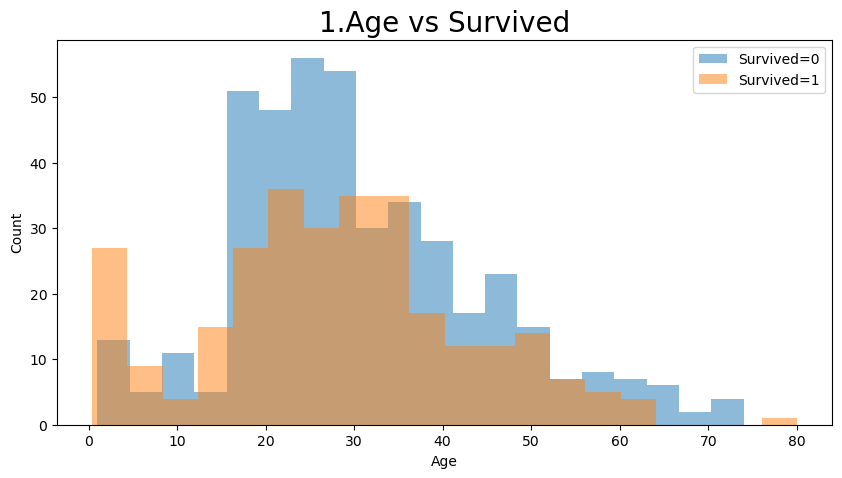

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(train_df[train_df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Survived=0')
plt.hist(train_df[train_df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived=1')
plt.title('1.Age vs Survived', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

* 1.嬰兒(age<4)具有較高的生存率
* 2.非常年長(age>80)有生還人數
* 3.大量的 15~30 歲乘客都沒有生存下來
* 4.大多數的乘客在於15-40歲
##### 因此我們在訓練中可以使用 age，將其遺漏值填補後進行分類

#### 2.視覺化 Pclass vs Survived

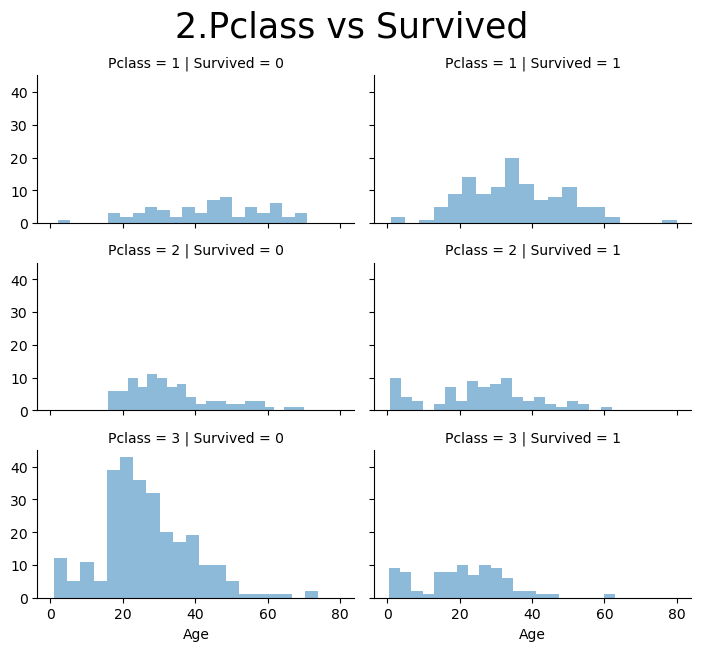

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.fig.suptitle('2.Pclass vs Survived', fontsize=25)
plt.subplots_adjust(top=0.88)
grid.add_legend()
plt.show()

* 1.Pclass=1 生存率比較高，也印證了上面的分析
* 2.Pclass=2與3 大多數的嬰幼兒生存
* 3.Pcalss=3 中多數乘客都沒有生還
* 而從上面來看，乘客年齡有存在分布上的差異
##### 最後訓練的時候，可以考慮使用 Pclass 做為特徵之一，因為他與生還率有關聯

#### 3.從Embarked(上船港口)去看男女性生還率

C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


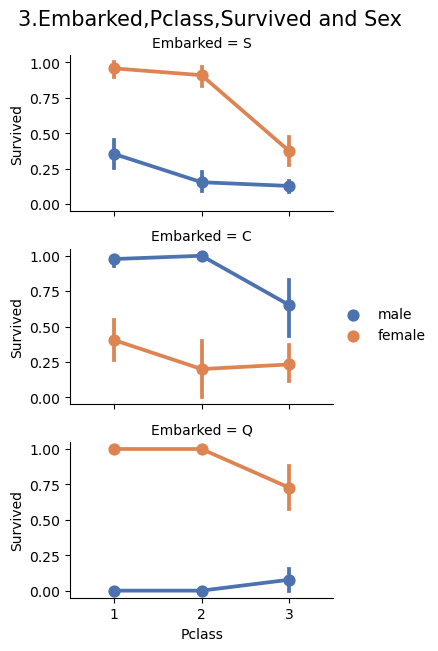

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.fig.suptitle('3.Embarked,Pclass,Survived and Sex', fontsize=15)
plt.subplots_adjust(top=0.91)
grid.add_legend()

#### 4.Embarked(登船港口)、Survived(生還率)、Sex and Fare(票價)

C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\baoqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\baoqi\anaco

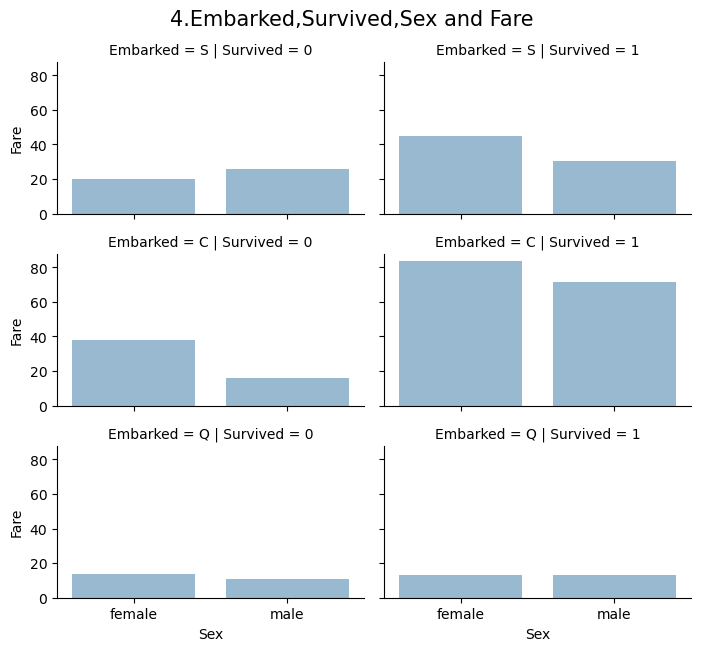

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.fig.suptitle('4.Embarked,Survived,Sex and Fare', fontsize=15)
plt.subplots_adjust(top=0.9)
grid.add_legend()

從上圖來看，票價高低也與生還率有關係，而從C港口上船的乘客買越高的票價生還率也就越高
##### 因此將票價納入訓練模型變量之一，為了更好訓練會將票價切分成不同區間，以便更好理解不同票價區間對於生還率之間的關係

### 4.3開始處理數據

#### 1.處理數據

In [18]:
print('Before', train_df.shape, test_df.shape, combine_data[0].shape, combine_data[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine=[train_df,test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### 2.處理性別與名字欄位
* 為了更好處理姓名欄位資料，將試圖從文字中提取出現有的特徵
    * 1.使用正規表達式 Name提取稱號(Title)中以(.)結束的第一個單詞，例如 : 'Mr.'、'Mrs.'、'Miss.'。使用 expand=Falese返回一個 dataframe

In [19]:
# str.extract() 函數提取 Name 欄位中的信息
# ([A-Za-z]+)\.' 是一個正則表達式模式，它用來匹配 Name 欄位中的文本
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


部分較少出現的稱號我們可以使用 "Rare" 做為替代

In [20]:
for dataset in combine:
    # 替換掉稀少的稱呼為 Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    # 將一些等效的敬稱（例如 'Mlle'、'Ms'、'Mme'）映射為通用的敬稱（'Miss'、'Mrs'）
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
# 將 Title 文字換成數值型
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


可以看到 Title 變成樹執行資料，所以可以刪除 PassengerId 與 Name	

In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
combine

[     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0           0       3    male  22.0      1      0   7.2500        S      1
 1           1       1  female  38.0      1      0  71.2833        C      3
 2           1       3  female  26.0      0      0   7.9250        S      2
 3           1       1  female  35.0      1      0  53.1000        S      3
 4           0       3    male  35.0      0      0   8.0500        S      1
 ..        ...     ...     ...   ...    ...    ...      ...      ...    ...
 886         0       2    male  27.0      0      0  13.0000        S      5
 887         1       1  female  19.0      0      0  30.0000        S      2
 888         0       3  female   NaN      1      2  23.4500        S      2
 889         1       1    male  26.0      0      0  30.0000        C      1
 890         0       3    male  32.0      0      0   7.7500        Q      1
 
 [891 rows x 9 columns],
      PassengerId  Pclass     Sex   Age  SibSp  Parch      Fa

#### 3.轉換分類特徵

In [23]:
# 轉換性別 female=1 male=0
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### 4.對 Age 特徵補空值
因為 'Age'、'Gender'與'Pclass' 之間可能存在關係。所以可以使用 'Gender'與'Pclass'兩個特徵組合來猜 'Age'

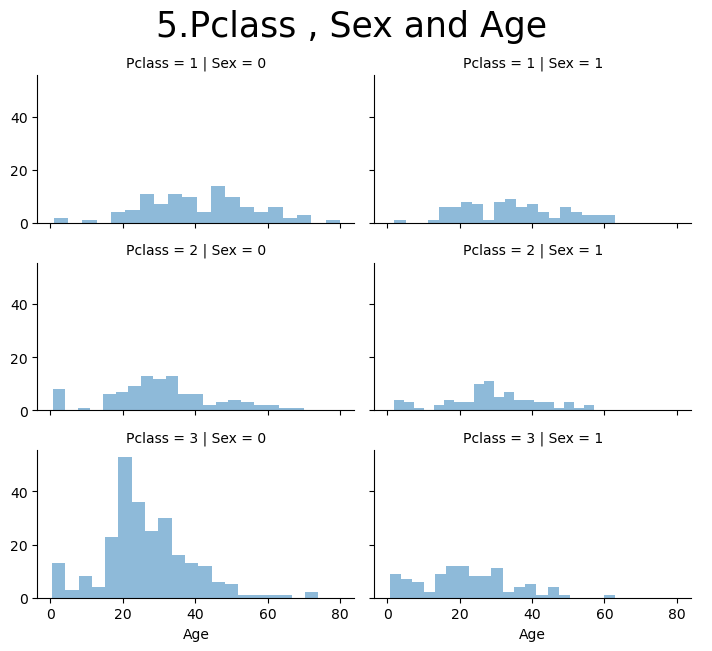

In [24]:
# 繪製 Pclass 、 Sex 與 Age 之間關係
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.fig.suptitle('5.Pclass , Sex and Age', fontsize=25)
plt.subplots_adjust(top=0.88)
grid.add_legend()

In [25]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [26]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

#### 相較於原本程式的作者使用三層 for 迴圈
#### 我改用 KnnImputer 方式來補 Age 空值

In [27]:
# 這邊我準備使用 knnImputer 方式來補空值
from sklearn.impute import KNNImputer
# 提取出要使用的欄位
selected_columns = ['Pclass', 'Sex', 'Age']
subset_train = train_df[selected_columns].copy()
subset_test = test_df[selected_columns].copy()

# 創建一個 knnImputer 方式，指定 n_neighbors = 5，也就是從最相似的 5 個列資料找出填補值
imputer_knn = KNNImputer(n_neighbors=3)
imputed_train_data = imputer_knn.fit_transform(subset_train) 
imputed_test_data = imputer_knn.fit_transform(subset_test) 

In [28]:
# 將填充後的資料轉換回 DataFrame
train_df['Age'] = imputed_train_data[:, 2]  # 更新原始 DataFrame 的 'Age' 列
test_df['Age'] = imputed_test_data[:, 2]

In [29]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.3+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float

In [30]:
# 訓練集 與 測試集 的 Age 欄位都沒有空值了
print(train_df['Age'].isnull().any())
print(test_df['Age'].isnull().any())

False
False


#### 5.處理 Age 分組

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.338843
2,"(32.252, 48.168]",0.405286
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
# 依照上面表格來對 Age 做分組
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


#### 6.創建一個 FamilySize特徵 把 Parch 與 SibSp 整合起來

In [33]:
# 把 SibSp 與 Parch 相加，+1 表示包含自己，成為一個新的特徵為 "家庭規模"
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### 7.另外可以創建一個特徵為 IsAlone 表示這個乘客是否獨自一人

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] ==1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()  

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### 8.接著我們刪除 'Parch', 'SibSp', 'FamilySize'

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


#### 9.創建一個 Age*Class 將乘客年齡與船艙等級結合一起

In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


#### 10.填補 Embarked(登船港口)

In [37]:
# 可以看到 Embarked 裡最常出現的為 "S"
train_df.Embarked.mode()[0]

'S'

In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### 11.將登船港口 C、Q、S 轉換成 0 1 2

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0


#### 填補 Fare(票價)
* 因為只有 test_df 在該欄位出現遺漏值，所以針對 test_df 操作就好

In [40]:
test_df['Fare'].mode()[0]

7.75

In [41]:
test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

#### 為 Fare 創建一個新的特徵，FareBand 
* 將 Fare 分成數個區塊，方便模型訓練

In [42]:
# qcut 根據數據分布的四分位數來切割目標欄位
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [43]:
# 從上表來看可得知如何切割數據的區間
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0
5,0,3,0,1.0,1,2,1,1,3.0
6,0,1,0,3.0,3,0,1,1,3.0
7,0,3,0,0.0,2,0,4,0,0.0
8,1,3,1,1.0,1,0,3,0,3.0
9,1,2,1,0.0,2,1,3,0,0.0


In [44]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2.0,0,2,1,1,6.0
1,893,3,1,2.0,0,0,3,0,6.0
2,894,2,0,3.0,1,2,1,1,6.0
3,895,3,0,1.0,1,0,1,1,3.0
4,896,3,1,1.0,1,0,3,0,3.0
5,897,3,0,0.0,1,0,1,1,0.0
6,898,3,1,1.0,0,2,2,1,3.0
7,899,2,0,1.0,2,0,1,0,2.0
8,900,3,1,1.0,0,1,3,1,3.0
9,901,3,0,1.0,2,0,1,0,3.0


完成 數據清理 與 前置

### 4.4 繪製特徵之間相關係數圖

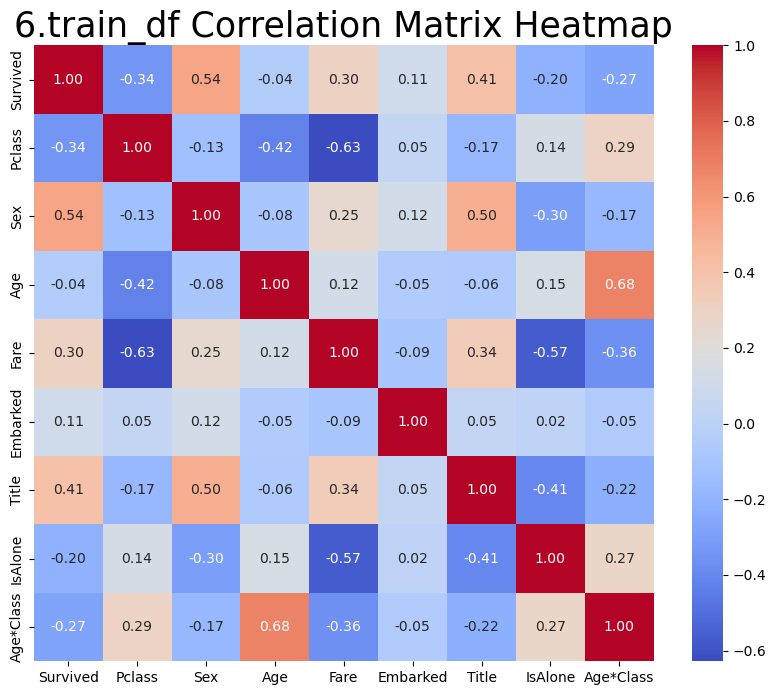

In [55]:
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
# 繪製關係矩陣圖
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# 添加標題
plt.title('6.train_df Correlation Matrix Heatmap', fontsize=25)
# 顯示熱像圖
plt.show()

#### 從以上的相關係數矩陣圖來解讀其他特徵與是否生還之間的關係
* 相關係數斜對角為自相關所以係數一定是 1
* **1. Pclass 與 Survived:** 之間相關係數為 -0.34，也就是呈現負相關。Pclass 數字越大表示船艙等級越低，表示船艙等級越低生存率越低
* **2. Sex 與 Survived:** 呈現正相關，相關係數為 0.54。1表示女性，表示女性更容易生存
* **3.Age 與 Survived:** 呈現低程度負相關，相關係數為 -0.04，所以我們待會看另一個特徵 Age*Class
* **4.Age*Class 與 Survived:** 呈現負相關，相關係數為 -0.27。也就是說特定年齡與船艙等級組合，會更不容易生存
* **5.Title 與 Survived:** 呈現正相關，相關係數為 0.41。表示特定稱謂的乘客有較高的生存率
* **6.Fare 與 Survived:** 呈現正相關，相關係數為 0.3。表示支付越多的船票價格也會因為部分因素而提升生存率。
* **7.Embarked 與 Survived:** 呈現正相關，相關係數為 0.11。也就是從 2(Q) 港口上船的乘客，生存率可能比較高

## 5.建模、預測和解決問題
#### 將練習透過回歸與分類來預測生存性，包含以下幾種方式
##### 以下演算法的解說筆記將放在 github
* Logistic Regression(邏輯回歸)
* KNN or k-Nearest Neighbors (KNN或k-最近鄰)
* Support Vector Machines (SVM)
* Naive Bayes classifier (朴素貝葉斯分類器)
* Decision Tree (決策樹)
* Random Forrest (隨機森林)
* Perceptron (感知器)
* Artificial neural network (人工神經網絡)
* RVM or Relevance Vector Machine (RVM或相關向量機)

In [47]:
# X_train 為訓練資料去除是否生還
X_train = train_df.drop("Survived", axis=1)
# Y_train 為存還是否生還
Y_train = train_df["Survived"]
# X_test 為去除 test_df 的 PassengerId 資料
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### 5.1 Logistic Regression 邏輯回歸

In [57]:
# 創建一個 Logistic Regression 方法
logreg = LogisticRegression()
# 擬和資料進去邏輯回歸演算法
logreg.fit(X_train, Y_train)
logreg_y_pred = logreg.predict(X_test)

In [58]:
# 列印出預測結果
logreg_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [59]:
# 計算精確準度
# 由訓練 X_train 的答案來對照原始答案(Y_train) 來計算準確度
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.48

### 5.2 支持向量機(Support Vector Machines, SVM)

In [61]:
#創建 SVM 分類器
svc = SVC()
svc.fit(X_train, Y_train)
svc_y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.05

### 5.3 k-最近鄰算法（k-Nearest Neighbors，簡稱k-NN）

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

* Knn 與 SVM 比較。Knn的生成信心分數通常比邏輯回歸高，但是某些情況下還是會略低於 **"SVM"**，**"SVM"** 比起 **"Knn"** 更適合處理 "高維度數據" 或是 "更複雜的分類"

### 5.4  Gaussian Naive Bayes

In [71]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

### 5.5 Perceptron

In [70]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
perceptron_Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.88

### 5.6 Linear SVC

In [72]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc_y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\baoqi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\baoqi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.8

### 5.7 Stochastic Gradient Descent

In [73]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.65

### 5.8 Decision Tree

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
des_y_pred = decision_tree.predict(X_test)
acc_des = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_des

86.53

### 5.9 Random Forset

In [84]:
# n_estimators=100 設定訓練 100 棵決策樹
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_y_pred = random_forest.predict(X_test)
acc_random = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random

86.53

### 將所有演算法的分數整合起來比較

In [85]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'k-Nearest Neighbors', 
              'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Stochastic Gradient Descent', 'Decision Tree', 'Random Forset' ],
    'Score': [acc_log, acc_svc, acc_knn, acc_gaussian, 
              acc_perceptron, acc_linear_svc, acc_sgd, 
              acc_des, acc_random]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,86.53
8,Random Forset,86.53
2,k-Nearest Neighbors,84.06
1,SVM,83.05
0,Logistic Regression,81.48
5,Linear SVC,79.80
3,Gaussian Naive Bayes,76.88
4,Perceptron,76.88
6,Stochastic Gradient Descent,75.65
